In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./committee_data.csv')

df = pd.DataFrame(data)
# Display basic information about the dataset
print("Initial Data:")
print(df.info())
print(df.head())

Initial Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   committee_id   5000 non-null   float64
 1   no_of_members  5002 non-null   int64  
 2   no_of_posts    5002 non-null   int64  
 3   no_of_events   5002 non-null   int64  
 4   followers      5002 non-null   int64  
 5   tags           5002 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 234.6+ KB
None
   committee_id  no_of_members  no_of_posts  no_of_events  followers  \
0           1.0             12           28             9         35   
1           2.0             13           30            11         24   
2           3.0             15           17             8         27   
3           4.0             14           30            18         18   
4           5.0             12           30            18         39   

                  tags  
0

In [3]:
# Data Cleaning

# Check for missing values
print("\nMissing Values: \n")
print(df.isnull().sum())

# Remove duplicate records if any
df.drop_duplicates(inplace=True)

df = df.dropna()

print("\nAfter cleaning \n")
print(df.isnull().sum())


# Assume no_of_posts and no_of_events are monthly totals.
# Create weekly rates by dividing by 4 (approximation).
df['weekly_post_rate'] = df['no_of_posts'] / 4
df['weekly_event_rate'] = df['no_of_events'] / 4


Missing Values: 

committee_id     2
no_of_members    0
no_of_posts      0
no_of_events     0
followers        0
tags             0
dtype: int64

After cleaning 

committee_id     0
no_of_members    0
no_of_posts      0
no_of_events     0
followers        0
tags             0
dtype: int64


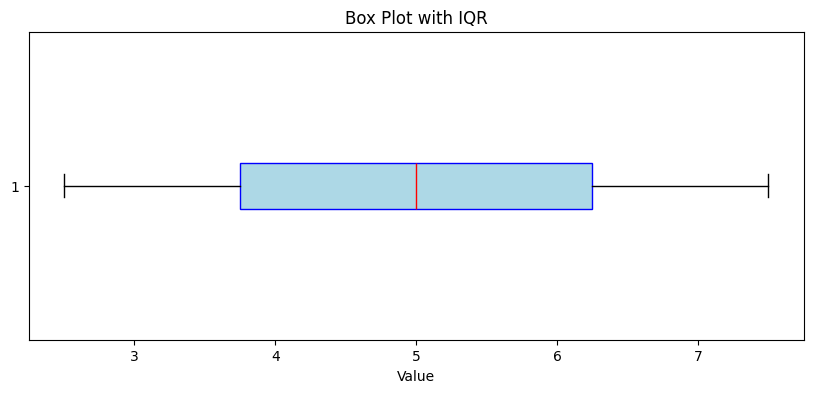

In [4]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['weekly_post_rate'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot with IQR')
plt.xlabel('Value')
plt.show()

In [5]:
multiplier = 0.5

columns = ['no_of_members', 'no_of_posts', 'no_of_events', 
                     'followers', 'weekly_post_rate', 'weekly_event_rate']
                     
df_filtered = df.copy()
for col in columns:
    # Calculate Q1, Q3 and the IQR for the column
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the DataFrame to keep only data points within the bounds
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

print(df_filtered.head())


   committee_id  no_of_members  no_of_posts  no_of_events  followers  \
0           1.0             12           28             9         35   
1           2.0             13           30            11         24   
2           3.0             15           17             8         27   
3           4.0             14           30            18         18   
4           5.0             12           30            18         39   

                  tags  weekly_post_rate  weekly_event_rate  
0              science              7.00               2.25  
1              science              7.50               2.75  
2               sports              4.25               2.00  
3  science, literature              7.50               4.50  
4           literature              7.50               4.50  


Q1: 2.25
Q3: 4.00
IQR: 1.75
Lower bound: 1.38
Upper bound: 4.88


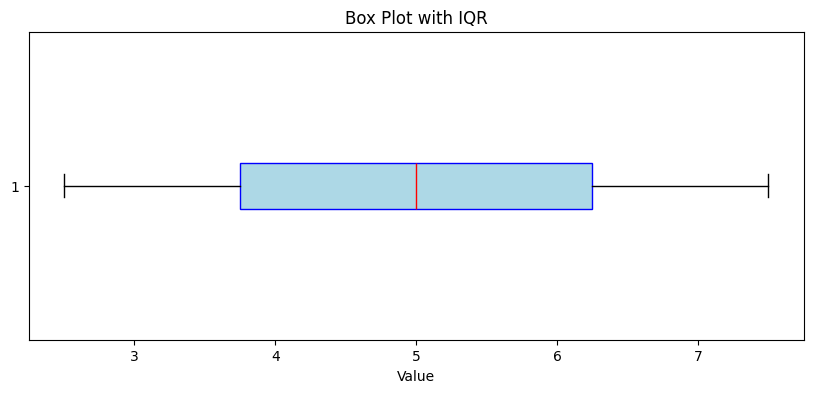

In [6]:
# Generate sample data: e.g., 1000 values from a normal distribution
# np.random.seed(42)
# data = np.random.randn(1000) * 10 + 50  # Adjust distribution as needed
# df = pd.DataFrame({'value': data})

# # Calculate Q1, Q3, IQR, and bounds for outliers using 1.5*IQR rule
# Q1 = df['value'].quantile(0.25)
# Q3 = df['value'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# ---------------------------
# Plot 1: Box Plot
# ---------------------------
plt.figure(figsize=(10, 4))
plt.boxplot(df['weekly_post_rate'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.title('Box Plot with IQR')
plt.xlabel('Value')
plt.show()

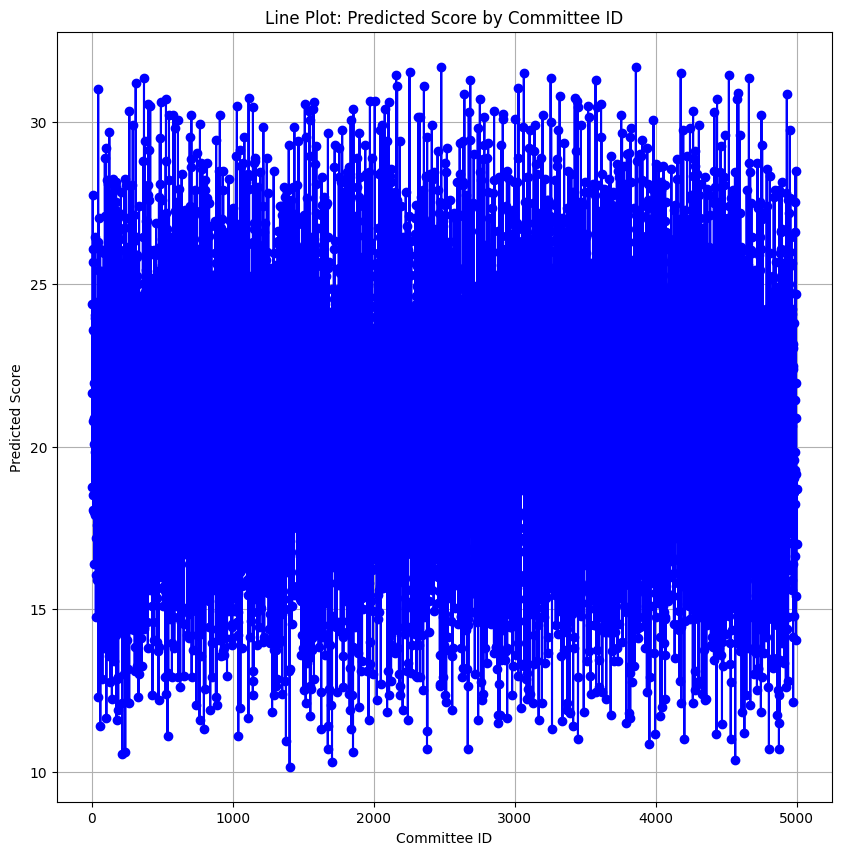

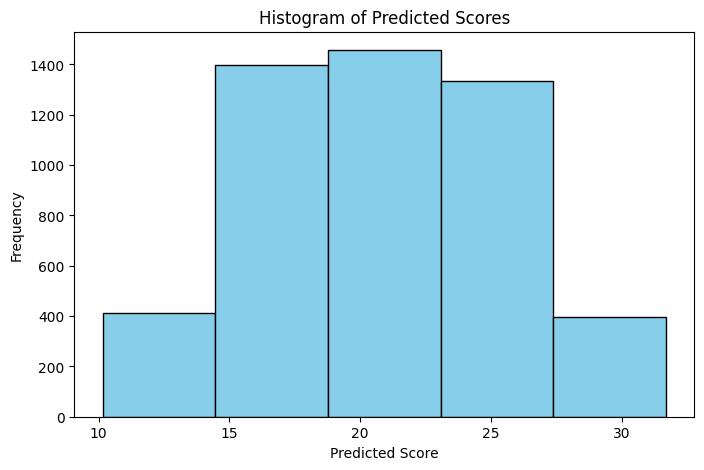

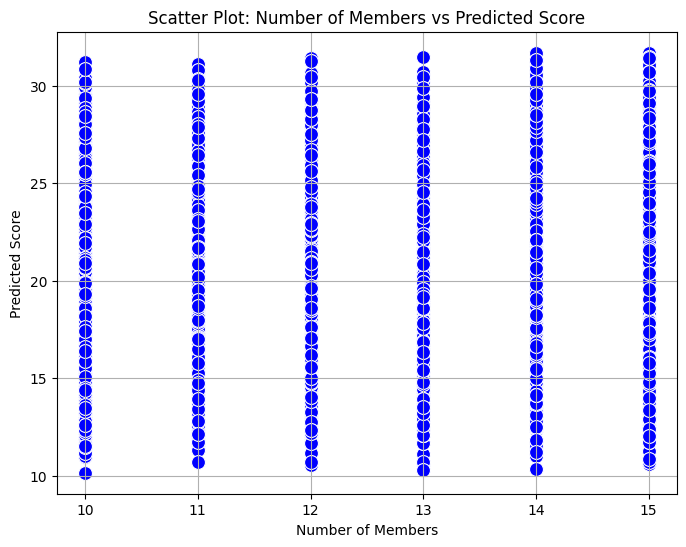

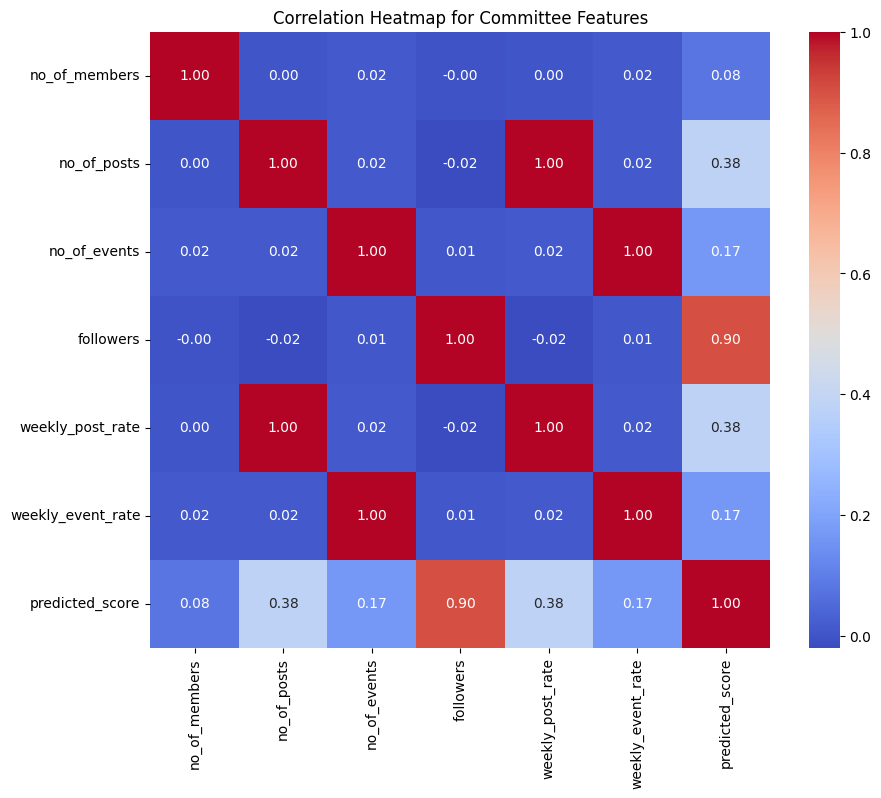

In [7]:

weights = {
    'no_of_members': 0.20,
    'no_of_posts': 0.30,
    'no_of_events': 0.15,
    'followers': 0.35
}

df['predicted_score'] = (
    df['no_of_members'] * weights['no_of_members'] +
    df['no_of_posts']   * weights['no_of_posts'] +
    df['no_of_events']  * weights['no_of_events'] +
    df['followers']     * weights['followers']
)

# Plot committee IDs (x-axis) versus predicted score (y-axis) as a line plot.
plt.figure(figsize=(10, 10))
plt.plot(df['committee_id'], df['predicted_score'], marker='o', linestyle='-', color='b')
plt.title("Line Plot: Predicted Score by Committee ID")
plt.xlabel("Committee ID")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()


# --- C. Histogram ---
# Plot a histogram to visualize the distribution of predicted scores.
plt.figure(figsize=(8, 5))
plt.hist(df['predicted_score'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Predicted Scores")
plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.show()


# -------------------------------
# 3. Scatter Plot
# -------------------------------
# Visualize the relationship between the number of members and the predicted score.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='no_of_members', y='predicted_score', data=df, s=100, color='blue', marker='o')
plt.title("Scatter Plot: Number of Members vs Predicted Score")
plt.xlabel("Number of Members")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()

# -------------------------------
# 4. Heatmap
# -------------------------------
# Compute a correlation matrix for all numeric features including the newly created ones.
numeric_features = ['no_of_members', 'no_of_posts', 'no_of_events', 
                    'followers', 'weekly_post_rate', 'weekly_event_rate', 'predicted_score']
corr_matrix = df[numeric_features].corr()

# Plot the heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Committee Features")
plt.show()


In [8]:
# Feature Engineering and Preprocessing

# Optional: Standardize features (except committee_id) if needed for modeling.
features_to_scale = ['no_of_members', 'no_of_posts', 'no_of_events', 
                     'followers', 'weekly_post_rate', 'weekly_event_rate']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

In [9]:

# -------------------------------
# 4. Regression Modeling: Predict and Rank Committees
# -------------------------------

# Define features for regression (using the original non-scaled values for simplicity)
feature_cols = [
    # 'no_of_members', 
    'no_of_posts', 
    # 'no_of_events', 
    'followers', 
    # 'weekly_post_rate', 
    # 'weekly_event_rate'
]
X = df[feature_cols]
y = df['predicted_score']

# Split data into training and testing sets (using a small test set here)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error on Test Data:", mse)

# Predict performance scores for all committees
df['predicted_score'] = model.predict(X)

df.to_csv("./linear_df.csv")

# Rank committees based on predicted performance score (highest first)
df_ranked = df.sort_values('predicted_score', ascending=False)
print("\nCommittee Rankings based on Predicted Performance Score:")
print(df_ranked[['committee_id', 'predicted_score']])


Mean Squared Error on Test Data: 0.6015545470148032

Committee Rankings based on Predicted Performance Score:
      committee_id  predicted_score
3519        3520.0        30.902907
4577        4578.0        30.902907
2157        2158.0        30.902907
3468        3469.0        30.902907
4176        4177.0        30.902907
...            ...              ...
3936        3937.0        11.155670
3954        3955.0        10.853553
1548        1549.0        10.853553
4262        4263.0        10.853553
4563        4564.0        10.853553

[5000 rows x 2 columns]


In [10]:
# Write code for recommending based on tags
# Current tags are sports,literature,science
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_committees(user_tags, committees_df):
  
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    
    # Fit the vectorizer on the committee tags and transform them into vectors
    committee_vectors = vectorizer.fit_transform(committees_df['tags'])
    
    # Transform the user's tags into a vector using the same vectorizer
    user_vector = vectorizer.transform([user_tags])
    
    # Compute cosine similarity between the user vector and each committee vector
    cosine_similarities = cosine_similarity(user_vector, committee_vectors).flatten()
    
    # Add the similarity score to the DataFrame
    committees_df["similarity_score"] = cosine_similarities
    
    # Sort the committees by similarity score in descending order
    recommendations = committees_df.sort_values("similarity_score", ascending=False)
    
    return recommendations

user_tags = "science literature"
    
# Get recommendations based on tag similarity
recommendations = recommend_committees(user_tags, df)

print(recommendations[["committee_id", "tags", "similarity_score"]])

      committee_id                 tags  similarity_score
4952        4953.0  science, literature               1.0
4965        4966.0  science, literature               1.0
7              8.0  science, literature               1.0
4947        4948.0  science, literature               1.0
15            16.0  science, literature               1.0
...            ...                  ...               ...
44            45.0               sports               0.0
53            54.0               sports               0.0
62            63.0               sports               0.0
3084        3085.0               sports               0.0
3086        3087.0               sports               0.0

[5000 rows x 3 columns]


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ----- Assume df already has both 'predicted_score' and 'similarity_score' columns -----
# For demonstration, here's a sample df:
# df = pd.DataFrame({
#     'committee_id': [1, 2, 3, 4],
#     'predicted_score': [75, 82, 68, 90],
#     'similarity_score': [0.85, 0.60, 0.95, 0.70],
#     'tags': ['sports science', 'literature', 'science literature', 'sports']
# })

# Copy the DataFrame so we don't modify the original
df_merged = df.copy()

# ----- Step 1: Normalize the Scores -----
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the predicted_score (scaling to [0, 1])
df_merged['predicted_score_norm'] = scaler.fit_transform(df_merged[['predicted_score']])
# Normalize the similarity_score (scaling to [0, 1])
df_merged['similarity_score_norm'] = scaler.fit_transform(df_merged[['similarity_score']])

# ----- Step 2: Compute a Combined Score -----
# Here, we give equal weight to both scores.
# You can adjust the weights if one score is more important than the other.
df_merged['combined_score'] = 0.4 * df_merged['predicted_score_norm'] + 0.6 * df_merged['similarity_score_norm']


# ----- Step 3: Rank the Committees Based on the Combined Score -----
df_final = df_merged.sort_values('combined_score', ascending=False)

# Display the final merged ranking
print("Final Merged Committee Rankings:")
print(df_final[['committee_id', 'predicted_score', 'similarity_score', 'combined_score']])


Final Merged Committee Rankings:
      committee_id  predicted_score  similarity_score  combined_score
3468        3469.0        30.902907               1.0        1.000000
4577        4578.0        30.902907               1.0        1.000000
2410        2411.0        30.600789               1.0        0.993973
4415        4416.0        30.552732               1.0        0.993014
4490        4491.0        30.298671               1.0        0.987945
...            ...              ...               ...             ...
793          794.0        11.807963               0.0        0.019041
44            45.0        11.759906               0.0        0.018082
2883        2884.0        11.457788               0.0        0.012055
4262        4263.0        10.853553               0.0        0.000000
3954        3955.0        10.853553               0.0        0.000000

[5000 rows x 4 columns]


In [13]:
import joblib
joblib.dump(model, "../models/final_model.pkl")

['../models/final_model.pkl']

In [12]:
# Problem Definition:

# Understand the Business Objective: Clearly define what problem you are trying to solve and what success looks like.
# Specify the ML Task: Identify if it’s a classification, regression, clustering, or another type of problem.
# Data Collection:

# Gather Data: Collect the relevant data from various sources (databases, APIs, web scraping, sensors, etc.).
# Data Storage: Organize and store the data securely for easy access and analysis.
# Data Cleaning and Preprocessing:

# Handling Missing Values: Remove, impute, or otherwise handle missing data.
# Removing Outliers: Identify and manage anomalous data points.
# Data Formatting: Convert data types, parse dates, and normalize text formats.
# Noise Reduction: Smooth or filter noisy data if necessary.
# Exploratory Data Analysis (EDA):

# Visualize Data: Use plots, histograms, and scatter plots to understand distributions, trends, and patterns.
# Statistical Analysis: Compute summary statistics to identify correlations and insights.
# Hypothesis Generation: Formulate potential reasons behind observed patterns.
# Feature Engineering and Selection:

# Feature Creation: Derive new features that could help the model (e.g., aggregations, ratios, or domain-specific transformations).
# Feature Transformation: Scale or normalize features to improve model convergence.
# Feature Selection: Identify and retain the most informative features using techniques like correlation analysis, PCA, or feature importance metrics.
# Model Selection:

# Choose Algorithms: Select one or more ML algorithms that are appropriate for your problem (e.g., decision trees, SVMs, neural networks).
# Baseline Model: Often start with a simple baseline model to set a performance benchmark.
# Model Training:

# Train-Test Split: Divide the data into training, validation, and test sets.
# Train the Model: Fit your selected algorithms on the training data.
# Cross-Validation: Use techniques like k-fold cross-validation to ensure the model’s robustness.
# Model Evaluation:

# Performance Metrics: Evaluate the model using appropriate metrics (accuracy, precision, recall, F1 score, RMSE, etc.) depending on the task.
# Validation: Assess overfitting or underfitting by comparing training and validation performance.
# Hyperparameter Tuning:

# Optimization: Use grid search, random search, or Bayesian optimization to find the optimal hyperparameters.
# Re-evaluation: Validate the tuned model to ensure improvements are consistent.
# Model Deployment:

# Integration: Deploy the model into a production environment where it can receive new data.
# API Development: Wrap the model in an API or service for real-time predictions.
# Scalability: Ensure the model can handle the expected load and is integrated with monitoring tools.
# Monitoring and Maintenance:

# Performance Monitoring: Continuously track model performance to detect degradation.
# Regular Updates: Periodically retrain or update the model with new data.
# Feedback Loop: Use user or system feedback to further improve the model.





# Try nueral network also

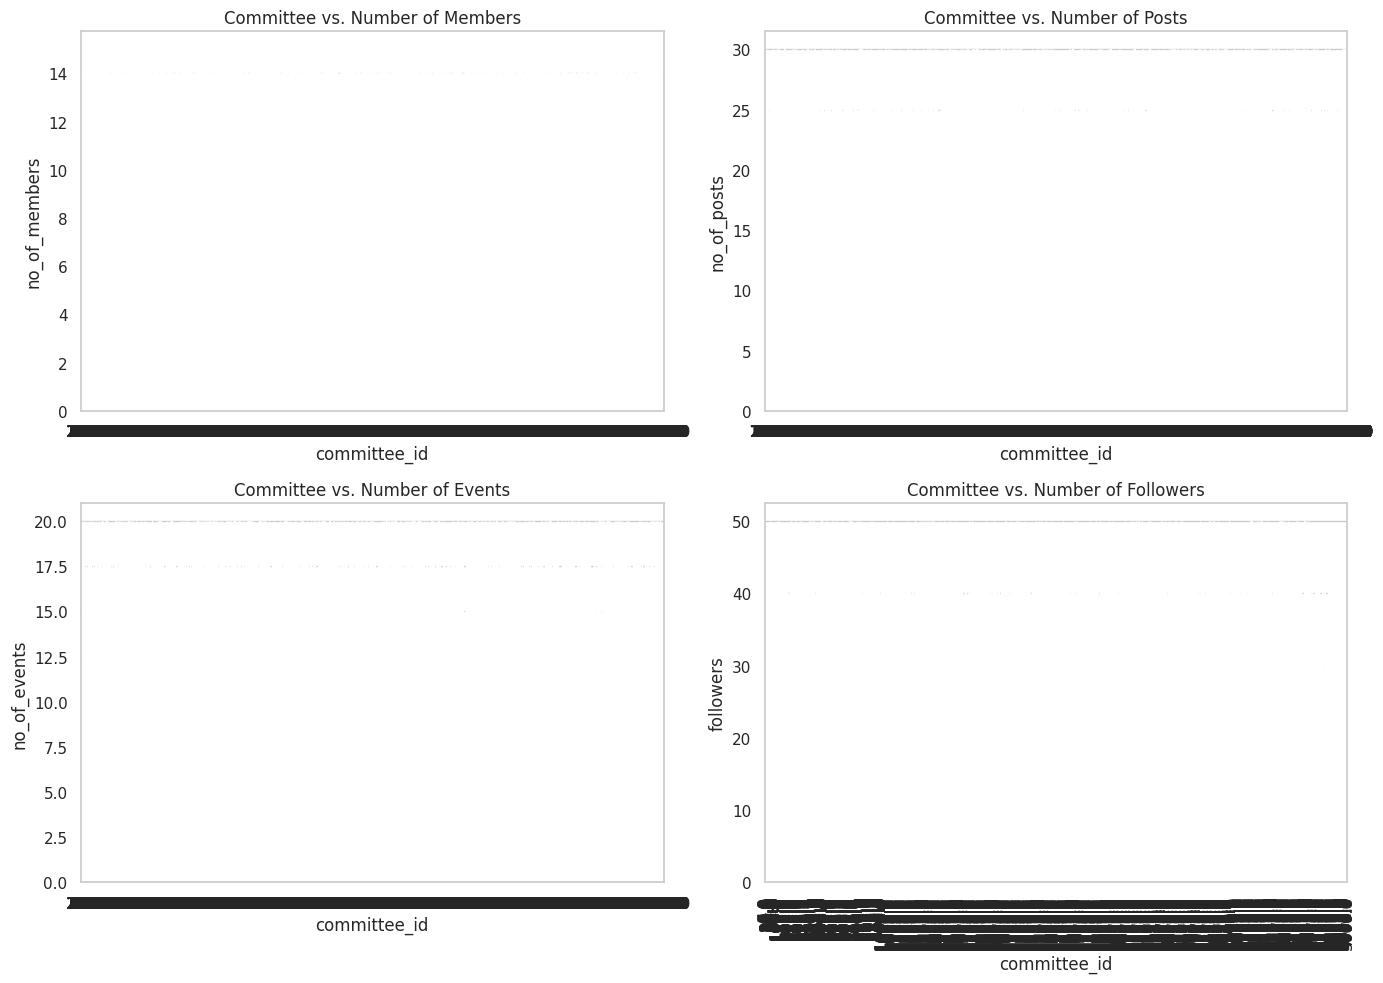

/tmp/ipykernel_3554/2385417234.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="tags", y="followers", data=df_exploded, estimator=sum, ci=None)


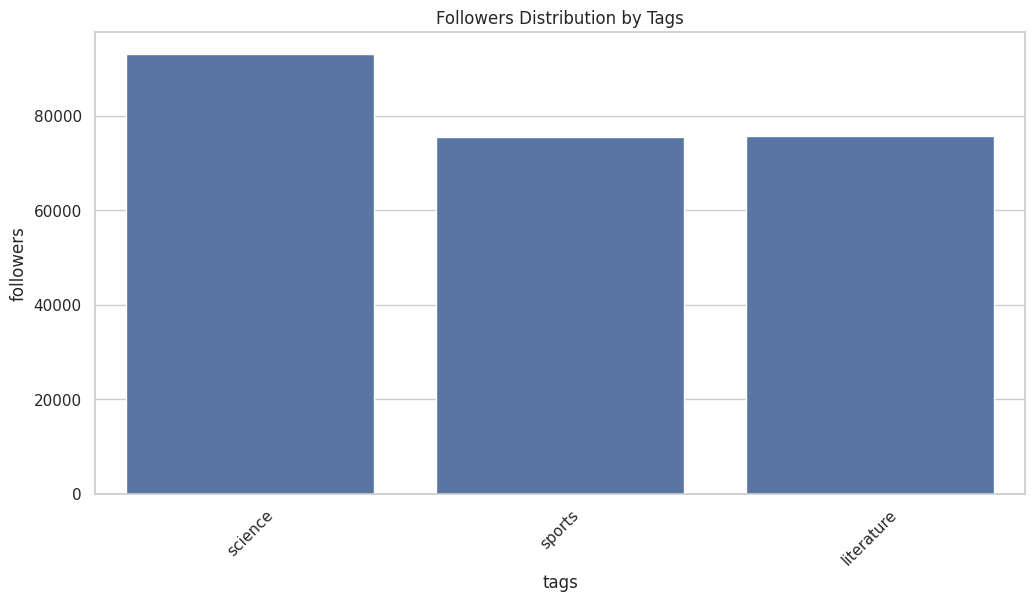

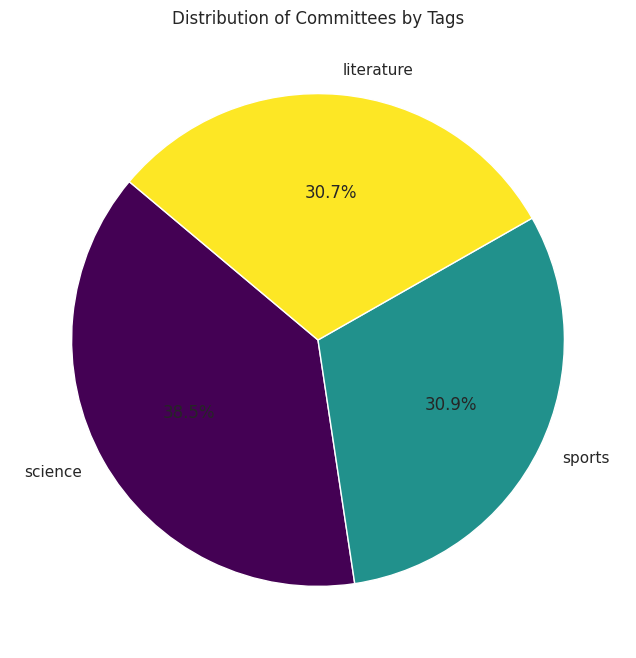

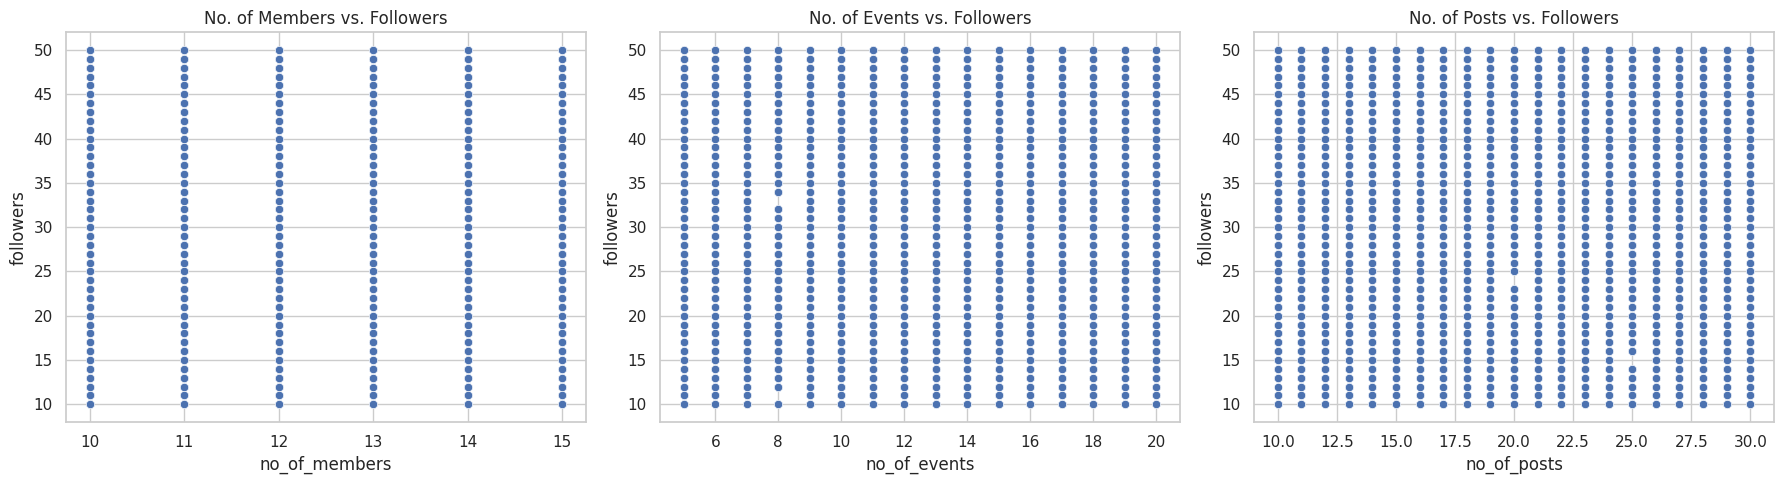

ValueError: setting an array element with a sequence.

<Figure size 1000x600 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
df["tags"] = df["tags"].apply(lambda x: x.split(", ") if isinstance(x, str) else [x])

# Explode tags into separate rows for visualization
df_exploded = df.explode("tags")

# Set Seaborn style
sns.set(style="whitegrid")

### 📊 Bar Chart - Committee Stats
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x="committee_id", y="no_of_members", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Committee vs. Number of Members")

sns.barplot(x="committee_id", y="no_of_posts", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Committee vs. Number of Posts")

sns.barplot(x="committee_id", y="no_of_events", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Committee vs. Number of Events")

sns.barplot(x="committee_id", y="followers", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Committee vs. Number of Followers")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 📊 Stacked Bar Chart - Tags vs Followers
plt.figure(figsize=(12, 6))
sns.barplot(x="tags", y="followers", data=df_exploded, estimator=sum, ci=None)
plt.title("Followers Distribution by Tags")
plt.xticks(rotation=45)
plt.show()

### 🥧 Pie Chart - Tag Distribution
plt.figure(figsize=(8, 8))
df_exploded["tags"].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="viridis")
plt.title("Distribution of Committees by Tags")
plt.ylabel("")
plt.show()

### 📈 Scatter Plots - Correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x="no_of_members", y="followers", data=df, ax=axes[0])
axes[0].set_title("No. of Members vs. Followers")

sns.scatterplot(x="no_of_events", y="followers", data=df, ax=axes[1])
axes[1].set_title("No. of Events vs. Followers")

sns.scatterplot(x="no_of_posts", y="followers", data=df, ax=axes[2])
axes[2].set_title("No. of Posts vs. Followers")

plt.tight_layout()
plt.show()

### 🔥 Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=["committee_id"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 🏀 Bubble Chart (Events vs Followers, Bubble = Posts)
plt.figure(figsize=(10, 6))
plt.scatter(df["no_of_events"], df["followers"], s=df["no_of_posts"] * 10, alpha=0.5, c=df["followers"], cmap="viridis")
plt.colorbar(label="Followers")
plt.xlabel("Number of Events")
plt.ylabel("Number of Followers")
plt.title("Committee Popularity: Events vs Followers (Bubble = Posts)")
plt.show()



In [ ]:

### ☁ Word Cloud - Tags
tags_text = " ".join(df_exploded["tags"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(tags_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Tags Word Cloud")
plt.show()